# Multi Layer Perceptron or Neural Networks

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ChemAI-Lab/AI4Chem/blob/main/website/modules/03-neural_networks.ipynb)

**References:**
1. **Chapters 5**: [Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/wp-content/uploads/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf), C. M. Bishop.
2. **Chapter 2**: [Machine Learning in Quantum Sciences](https://arxiv.org/pdf/2204.04198)
3. **Chapter 16**: [Probabilistic Machine Learning: An Introduction, K. P. Murphy.](https://probml.github.io/pml-book/book1.html)

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.colors import ListedColormap

from IPython.display import HTML

import ipywidgets as widgets
from IPython.display import display

from sklearn.datasets import make_moons, make_classification

import torch
from torch import nn

# Feed-Forward Network Functions

Linear models for regression or classification tasks rely on the assumption of having a **fixed** representation of $\mathbf{x}$ through the use of basis set functions $\phi$.
For binary classification, we saw that such models take the form of, 
$$
y = f(\mathbf{x},\mathbf{w}) = \sigma\left (\mathbf{w}^\top\phi(\mathbf{x})\right ),
$$
where the function $\sigma$ carries adds additional non-linearity to $f$. We will discuss later that the chose of $\sigma$ depends on the task at hand, some work best for classification and some for regression. <br>

Obviously, the only possible "improvement" to this family of models is making the basis functions $\phi_j(\cdot)$ depend on some parameters, which can and will be optimized during the training. <br>
In neural networks (NNs), each basis function can be defined as, 
> non-linear function of a linear combination of the inputs, where the coefficients in the linear combination are adaptive parameters.

$$
z_j =  \sigma\left (a_j \right ), \quad \text{where} \quad a_j = \mathbf{\omega}_j^\top \mathbf{x}
$$
We can see that $z_j$ comes from a composition of functions, first a linear function followed by the activation function ($\sigma$). $z_j$ are known in NNs as **neurons** and the quantities $a_j$ as **activation**. We shall refer to the parameters $\mathbf{\omega}_j$ as **weights** (and **biases**).

In the context of NNs, $z_j$ are called **hidden units**, and these values can be linearly combined again to create functions with a higher non-linear character. 


# Activation Functions

In the perceptron model, we assumed that $\phi(\mathbf{x})$ is a non linear differentiable transformation to generate the feature space representation. 
The jump to modern deep learning models is to assume $\phi(\mathbf{x})$ can be learned through some parameters, but for that we require a non-linear transformation, commonly known as **activation function**.
Typically, a differentiable nonlinear activation function is used in the hidden layers of a neural network. This allows the model to learn more complex functions than a network trained using a linear activation function.

## Sigmoid



Equation: $\sigma(x)=\frac{1}{1+e^{-x}}$\
Derivative: $\sigma'(x)=\sigma(x)(1-\sigma(x))$


In [ ]:
x = np.linspace(-6, 6, 400)
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

y = sigmoid(x)
dy = y * (1 - y)

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(x, y, color='k')
ax[0].set_title('Sigmoid')
ax[0].grid(True, alpha=0.2)
ax[1].plot(x, dy, color='k')
ax[1].set_title('Derivative')
ax[1].grid(True, alpha=0.2)
ax[0].set_xlabel(rf"$x$", fontsize=14)
ax[1].set_xlabel(rf"$x$", fontsize=14)
ax[0].set_ylabel(rf"$\sigma(x)$", fontsize=14)
ax[1].set_ylabel(r"$\frac{d\sigma(x)}{dx}$", fontsize=14,rotation=0,labelpad=25)
plt.tight_layout()

## Tanh



Equation: $\tanh(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$\
Derivative: $\frac{d}{dx}\tanh(x)=1-\tanh^2(x)$


In [ ]:
x = np.linspace(-6, 6, 400)
y = np.tanh(x)
dy = 1 - y**2

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(x, y, color='k')
ax[0].set_title('Tanh')
ax[0].grid(True, alpha=0.2)
ax[1].plot(x, dy, color='k')
ax[1].set_title('Derivative')
ax[1].grid(True, alpha=0.2)
ax[0].set_xlabel(rf"$x$", fontsize=14)
ax[1].set_xlabel(rf"$x$", fontsize=14)
ax[0].set_ylabel(rf"$\sigma(x)$", fontsize=14)
ax[1].set_ylabel(r"$\frac{d\sigma(x)}{dx}$",
                 fontsize=14, rotation=0, labelpad=25)
plt.tight_layout()

## ReLU



Equation: $\mathrm{ReLU}(x)=\max(0, x)$\
Derivative: $\mathrm{ReLU}'(x)=\begin{cases}1,&x>0\\0,&x\le 0\end{cases}$


In [ ]:
x = np.linspace(-6, 6, 400)
y = np.maximum(0, x)
dy = (x > 0).astype(float)

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(x, y, color='k')
ax[0].set_title('ReLU')
ax[0].grid(True, alpha=0.2)
ax[1].plot(x, dy, color='k')
ax[1].set_title('Derivative')
ax[1].grid(True, alpha=0.2)
ax[0].set_xlabel(rf"$x$", fontsize=14)
ax[1].set_xlabel(rf"$x$", fontsize=14)
ax[0].set_ylabel(rf"$\sigma(x)$", fontsize=14)
ax[1].set_ylabel(r"$\frac{d\sigma(x)}{dx}$",
                 fontsize=14, rotation=0, labelpad=25)
plt.tight_layout()

## Leaky ReLU



Equation: $\mathrm{LReLU}(x)=\max(\alpha x, x)$\
Derivative: $\mathrm{LReLU}'(x)=\begin{cases}1,&x>0\\\alpha,&x\le 0\end{cases}$


In [ ]:
x = np.linspace(-6, 6, 400)
alpha = 0.01
y = np.where(x > 0, x, alpha * x)
dy = np.where(x > 0, 1.0, alpha)

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(x, y, color='k')
ax[0].set_title('Leaky ReLU')
ax[0].grid(True, alpha=0.2)
ax[1].plot(x, dy, color='k')
ax[1].set_title('Derivative')
ax[1].grid(True, alpha=0.2)
ax[0].set_xlabel(rf"$x$", fontsize=14)
ax[1].set_xlabel(rf"$x$", fontsize=14)
ax[0].set_ylabel(rf"$\sigma(x)$", fontsize=14)
ax[1].set_ylabel(r"$\frac{d\sigma(x)}{dx}$",
                 fontsize=14, rotation=0, labelpad=25)
plt.tight_layout()

## ELU



Equation: $\mathrm{ELU}(x)=\begin{cases}x,&x>0\\\alpha(e^x-1),&x\le 0\end{cases}$\
Derivative: $\mathrm{ELU}'(x)=\begin{cases}1,&x>0\\\alpha e^x,&x\le 0\end{cases}$


In [ ]:
x = np.linspace(-6, 6, 400)
alpha = 1.0
y = np.where(x > 0, x, alpha * (np.exp(x) - 1))
dy = np.where(x > 0, 1.0, y + alpha)

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(x, y, color='k')
ax[0].set_title('ELU')
ax[0].grid(True, alpha=0.2)
ax[1].plot(x, dy, color='k')
ax[1].set_title('Derivative')
ax[1].grid(True, alpha=0.2)
ax[0].set_xlabel(rf"$x$", fontsize=14)
ax[1].set_xlabel(rf"$x$", fontsize=14)
ax[0].set_ylabel(rf"$\sigma(x)$", fontsize=14)
ax[1].set_ylabel(r"$\frac{d\sigma(x)}{dx}$",
                 fontsize=14, rotation=0, labelpad=25)
plt.tight_layout()

## Softplus



Equation: $\mathrm{Softplus}(x)=\ln(1+e^x)$\
Derivative: $\frac{d}{dx}\mathrm{Softplus}(x)=\sigma(x)$


In [ ]:
x = np.linspace(-6, 6, 400)
y = np.log1p(np.exp(x))
dy = 1.0 / (1.0 + np.exp(-x))

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(x, y, color='k')
ax[0].set_title('Softplus')
ax[0].grid(True, alpha=0.2)
ax[1].plot(x, dy, color='k')
ax[1].set_title('Derivative')
ax[1].grid(True, alpha=0.2)
ax[0].set_xlabel(rf"$x$", fontsize=14)
ax[1].set_xlabel(rf"$x$", fontsize=14)
ax[0].set_ylabel(rf"$\sigma(x)$", fontsize=14)
ax[1].set_ylabel(r"$\frac{d\sigma(x)}{dx}$",
                 fontsize=14, rotation=0, labelpad=25)
plt.tight_layout()

## GELU (approx)



Equation: $\mathrm{GELU}(x)=0.5x\left(1+\tanh\left(\sqrt{\tfrac{2}{\pi}}(x+0.044715x^3)\right)\right)$\
Derivative: $\mathrm{GELU}'(x)=0.5(1+\tanh u)+0.5x(1-\tanh^2 u)u'$, $u=\sqrt{\tfrac{2}{\pi}}(x+0.044715x^3)$, $u'=\sqrt{\tfrac{2}{\pi}}(1+3\cdot0.044715x^2)$


In [ ]:
x = np.linspace(-6, 6, 400)
def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))

y = gelu(x)
# Numerical derivative for visualization
dy = np.gradient(y, x)

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(x, y, color='k')
ax[0].set_title('GELU (approx)')
ax[0].grid(True, alpha=0.2)
ax[1].plot(x, dy, color='k')
ax[1].set_title('Derivative (numerical)')
ax[1].grid(True, alpha=0.2)
ax[0].set_xlabel(rf"$x$", fontsize=14)
ax[1].set_xlabel(rf"$x$", fontsize=14)
ax[0].set_ylabel(rf"$\sigma(x)$", fontsize=14)
ax[1].set_ylabel(r"$\frac{d\sigma(x)}{dx}$",
                 fontsize=14, rotation=0, labelpad=25)
plt.tight_layout()

# Single Layer Neural Network

In its core a NN is a **composition of functions**. Let's build the simplest NN possible, where a single **layer** of hidden units its use for classification. We will use the Binary Cross-Entropy loss, 
$$
{\cal L}_{\text{BCE}} = -\frac{1}{N}\sum_i^N \left (y_i\log(p_i) - (1 - y_i)\log(1- p_i) \right ), 
$$
where $y_i$ is true binary label, $y_i = [0,1]$, $p_i$ is the predicted probability.<br>


Recap of our previous model for classification, 
$$
p_0 = \sigma\left ( a_j \right )  = \sigma\left (\mathbf{w}^\top\phi(\mathbf{x}) \right ),
$$
this model has a **single** hidden neuron. We the sigmoid activation function.

Let's consider now a two hidden neuron representation for this same model, 
$$
p_0 =  \sigma\left (\mathbf{w}^\top\mathbf{z} \right ),
$$
where
$$
\mathbf{z} = \underbrace{\begin{bmatrix}
 z_1 \\
z_2
\end{bmatrix}}_{\text{hidden neurons}}
$$
where 
$$
z_j = \sigma'(\mathbf{\omega}_j^\top \phi(\mathbf{x})).
$$
For notation clearness, $\sigma'$ represent an activation function different from the sigmoid one that we use to predict the probability of $p_0$.
This function has the following diagram, <br>
<img src="https://github.com/ChemAI-Lab/AI4Chem/raw/main/website/modules/Figures/single_layer_mlp.png"
     width="600">


In [ ]:

def get_data(name="linear"):
    if name == "linear":
        X, y = make_classification(
            n_features=2, n_redundant=0, n_informative=2,
            n_clusters_per_class=1, class_sep=1.1, flip_y=0,
            random_state=1
        )

        rng = np.random.RandomState(2)
        X += 2 * rng.uniform(size=X.shape)
        linearly_separable = (X, y)
        dataset = linearly_separable
    elif name == "moons":
        X, y = make_moons(noise=0.1, n_samples=200, )
        dataset = (X, y)
    return dataset


dataset_name = "moons"
dataset = get_data(dataset_name)

cm_bright = ListedColormap(["#FF0000", "#0000FF"])
plt.figure(figsize=(8, 4))
plt.scatter(
    dataset[0][:, 0], dataset[0][:, 1],
    c=dataset[1], cmap=cm_bright,
    edgecolor='k', s=100
)
if dataset_name == "linear":
    plt.title("Linearly separable data", fontsize=16)
elif dataset_name == "moons":
    plt.title("Non-linearly separable data", fontsize=16)

In [ ]:
# build a simple two layer neural network classifier using PyTorch
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [ ]:
# training loop
X = torch.tensor(dataset[0], dtype=torch.float32)
y = torch.tensor(dataset[1], dtype=torch.float32).view(-1, 1)

hidden_neurons = 10
model = SimpleNN(input_size=2, hidden_size=hidden_neurons, output_size=1)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)

# Store snapshots in memory (no files)
state_history = []
bce_ = []
misclassified_ = []
snapshot_every = 10

num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % snapshot_every == 0:
        state_history.append({k: v.detach().cpu().clone() for k, v in model.state_dict().items()})
        bce_.append(loss.item())
        preds = (outputs >= 0.5).float()
        misclassified = (preds != y).sum().item()
        misclassified_.append(misclassified)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}, Misclassified: {misclassified}")


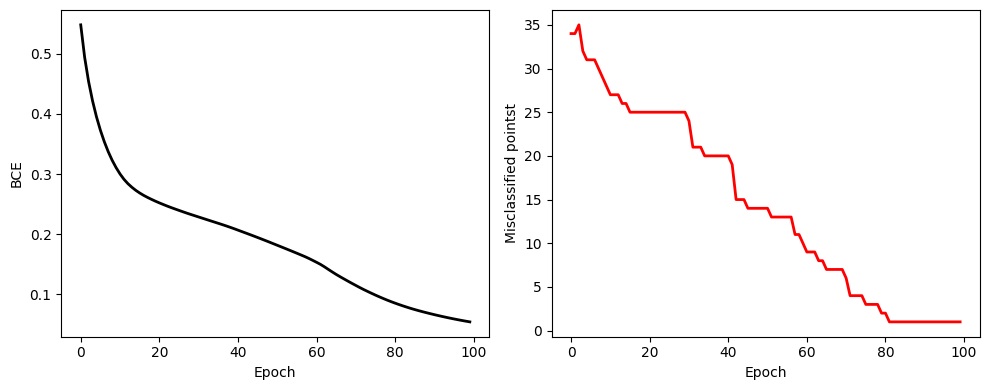

In [89]:
# subplots of BCE and misclassified samples
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(bce_, color="black", linewidth=2)
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("BCE")

axes[1].plot(misclassified_, color="red", linewidth=2)
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Misclassified pointst")

plt.tight_layout()

In [ ]:
# Animation using trained NN snapshots
X_np = dataset[0]
y_np = dataset[1]

fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(X_np[:, 0], X_np[:, 1], c=y_np, s=30, cmap=cm_bright, edgecolors="k")

x_min, x_max = X_np[:, 0].min() * 1.1, X_np[:, 0].max() * 1.1
y_min, y_max = X_np[:, 1].min() * 0.9, X_np[:, 1].max() * 1.1
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

x1 = np.linspace(x_min, x_max, 200)
x2 = np.linspace(y_min, y_max, 200)
x1_x2 = np.meshgrid(x1, x2)
X12_grid = np.c_[x1_x2[0].ravel(), x1_x2[1].ravel()]

contour = None

def decision_probabilities_nn(grid):
    with torch.no_grad():
        grid_t = torch.tensor(grid, dtype=torch.float32)
        probs = model(grid_t).view(-1).detach().cpu()
        probs = np.array(probs.tolist())
    return probs

def init():
    return ()

def update(frame):
    global contour
    model.load_state_dict(state_history[frame])

    prob_output = decision_probabilities_nn(X12_grid)
    if contour is not None:
        try:
            for coll in contour.collections:
                coll.remove()
        except AttributeError:
            contour.remove()
    contour = ax.contourf(
        x1_x2[0],
        x1_x2[1],
        prob_output.reshape(x1_x2[0].shape),
        levels=[0.0, 0.5, 1.0],
        alpha=0.2,
        colors=["red", "blue"],
    )

    ax.set_title(
        f"NN BCE probability surface - step {frame}, BCE={bce_[frame]:.4f}",
        fontsize=14,
    )
    return ()

ani_bce = animation.FuncAnimation(
    fig, update, frames=len(state_history), init_func=init, interval=300, blit=False
)
HTML(ani_bce.to_jshtml())